In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Discrete color bars

In matplotlib you typically manipulate the colormap itself in order to produce difference effects in the color map. Here I will demonstrate how to create a discrete color bar for normally distributed 2D data. This notebook will explain each step I went through, including the ones not directly related to creating the discrete colorbar.

### Step 1
Here we create 2 arrays of normally distributed data and then put the data in a 2d histogram. We don't have to have a histogram of data to plot these types of plots but the histogram shapes the generated data for `pcolormesh`.

In [2]:
x = np.random.randn(100000)
y = np.random.randn(100000)
h, ex, ey = np.histogram2d(x, y, bins=[100, 100], range=((-3, 3), (-3, 3)))

### Step 2

Here we explicitly declare the colormap so that we can manipulate it. As an example, we set the "bad" color to white.  A bad cell is one which  we have decided we shouldn't plot, in this case I say any part of the histogram that has a count of 0 is "bad" data. Then we create a masked array of the data. # masked data is a fancy way to set the good and bad data points. It does a lot of magic behind the scenes and I recommend reading the documentation surrounding masked data. (see references)

### Note:
1. setting the bad color isn't necessary for creating a discrete color bar, but it does make the plot prettier in my opinion.
2. while we originally created the histogram data array as h we will use the masked array a for the plot

In [9]:
cmap = plt.cm.gnuplot
cmap.set_bad(color='white')
a = np.ma.masked_where(h == 0, h)

### Discrete color bar magic
Here is where the magic happens for the discrete colorbar. Since we already declared the colorbar explicitly as `cmap`, we can now manipulate it with the `BoundaryNorm` function. First we create the bounding area for each discrete range we want to color, then we create the normalization for the colormap itself and call it `norm`.

In [7]:
bounds = np.arange(0, 71, 10)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

### Create the plot!
Now that we have assembled all of the parts necessary to create the plot, we can put them together to create beautiful plot with a discrete colormap. The most necessary parts here are using `cmap` and `norm` however also note we set `vmin` and `vmax` to follow the bounds.

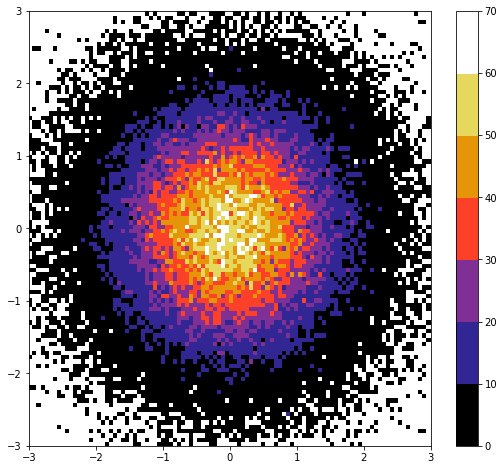

In [8]:
fig, ax = plt.subplots(figsize=(9, 8))
cbar = ax.pcolormesh(ex, ey, a, cmap=cmap, vmin=bounds.min(), vmax=bounds.max(), norm=norm)
fig.colorbar(cbar)

## Discrete colorbar for scatter plots
For scatter plots its similar to pcolormesh, however you have to set the color value. the `scatter` function accepts an additional `c` value which is an array the same shape as `x` and `y` values but is whatever the color is. Then we can set colormap, bounds, and norm like before.

In [30]:
c = (x + y)
cmap_scatter = plt.cm.seismic
bounds_scatter = np.arange(-5, 6, 1)
norm_scatter = mpl.colors.BoundaryNorm(bounds_scatter, cmap.N)

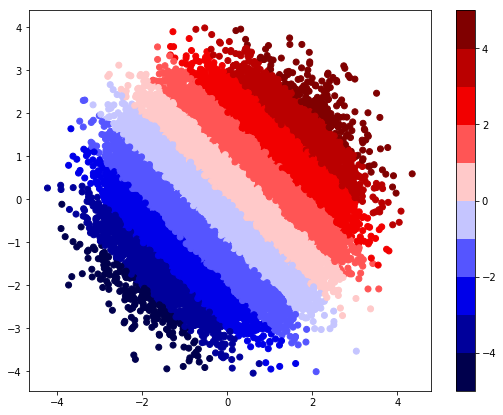

In [34]:
fig, ax = plt.subplots(figsize=(9, 7))

cbar = ax.scatter(x=x, y=y, c=c, cmap=cmap_scatter, norm=norm_scatter)
fig.colorbar(cbar)

# References

1. Masked arrays documentation: https://docs.scipy.org/doc/numpy/reference/maskedarray.html
2. stackoverflow post: https://stackoverflow.com/questions/14777066/matplotlib-discrete-colorbar